In [2]:
from glob import glob
import os
from pathlib import Path
from tqdm import tqdm
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
from multiprocessing import Pool, cpu_count
%matplotlib inline

# glob

In [3]:
#ファイルのリストを取得
glob.glob('*')

['DIVETOEXEM.ipynb',
 'Matplotlib.ipynb',
 'Matplotlib2.ipynb',
 'Matplotlib3.ipynb',
 'NumPy.ipynb',
 'OpenCV1.ipynb',
 'Others.ipynb',
 'Pandas1.ipynb',
 'Pandas2.ipynb',
 'Pandas3.ipynb',
 'Python3Test.ipynb',
 'Python3Test2.ipynb',
 'Seaborn.ipynb',
 'Seaborn2.ipynb',
 'Seaborn3.ipynb',
 'dataset',
 'figure',
 'public-covid-data',
 'sample_dict.npy',
 'sample_ndarray.npy',
 'test.ipynb']

In [6]:
glob.glob('public-covid-data/*/*')

['public-covid-data/rp_im/1.nii.gz',
 'public-covid-data/rp_im/2.nii.gz',
 'public-covid-data/rp_im/3.nii.gz',
 'public-covid-data/rp_im/4.nii.gz',
 'public-covid-data/rp_im/5.nii.gz',
 'public-covid-data/rp_im/6.nii.gz',
 'public-covid-data/rp_im/7.nii.gz',
 'public-covid-data/rp_im/8.nii.gz',
 'public-covid-data/rp_im/9.nii.gz',
 'public-covid-data/rp_msk/1.nii.gz',
 'public-covid-data/rp_msk/2.nii.gz',
 'public-covid-data/rp_msk/3.nii.gz',
 'public-covid-data/rp_msk/4.nii.gz',
 'public-covid-data/rp_msk/5.nii.gz',
 'public-covid-data/rp_msk/6.nii.gz',
 'public-covid-data/rp_msk/7.nii.gz',
 'public-covid-data/rp_msk/8.nii.gz',
 'public-covid-data/rp_msk/9.nii.gz']

In [7]:
glob.glob('public-covid-data/rp_im/[5-9]*')

['public-covid-data/rp_im/5.nii.gz',
 'public-covid-data/rp_im/6.nii.gz',
 'public-covid-data/rp_im/7.nii.gz',
 'public-covid-data/rp_im/8.nii.gz',
 'public-covid-data/rp_im/9.nii.gz']

# osとpathlib

In [3]:
#ディレクトリの取得
#pはpublic-covid-dataディレクトリのパスのオブジェクト
p = Path('public-covid-data/')

In [59]:
#イテレータを返す
list(p.iterdir())

[PosixPath('public-covid-data/rp_im'), PosixPath('public-covid-data/rp_msk')]

In [63]:
#サブディレクトリの下のファイルの取得
sub_p = list(p.iterdir())[0]

In [64]:
list(sub_p.iterdir())

[PosixPath('public-covid-data/rp_im/1.nii.gz'),
 PosixPath('public-covid-data/rp_im/2.nii.gz'),
 PosixPath('public-covid-data/rp_im/3.nii.gz'),
 PosixPath('public-covid-data/rp_im/4.nii.gz'),
 PosixPath('public-covid-data/rp_im/5.nii.gz'),
 PosixPath('public-covid-data/rp_im/6.nii.gz'),
 PosixPath('public-covid-data/rp_im/7.nii.gz'),
 PosixPath('public-covid-data/rp_im/8.nii.gz'),
 PosixPath('public-covid-data/rp_im/9.nii.gz')]

In [27]:
#正規表現
target_file = list(sub_p.glob('*[6-9]*'))[0]

In [28]:
target_file

PosixPath('public-covid-data/rp_im/6.nii.gz')

In [31]:
#ファイルパスをhead(ファイルパス)とtail(ファイル名)に分ける
folder_p, file_name = os.path.split(target_file)

In [32]:
folder_p

'public-covid-data/rp_im'

In [33]:
file_name

'6.nii.gz'

In [34]:
#ファイルパスとファイル名を連結する
os.path.join(folder_p, file_name)

'public-covid-data/rp_im/6.nii.gz'

## ディレクトリの作成

In [39]:
#public-covid-data配下にnew_folderディレクトリを作成する
p = Path('public-covid-data/')
new_folder_name = 'new_folder'
new_folder_path = os.path.join(p, new_folder_name) #新しいディレクトリパスの作成

In [38]:
new_folder_path

'public-covid-data/new_folder'

### os.path.exists():ディレクトリの有無を調べる

In [41]:
os.path.exists(new_folder_path)

False

### os.makedirs():ディレクトリの作成

In [43]:
#os.makedirs()はすでにそのディレクトリが存在するとエラーを返す
#なので、まずos.path.exists()を実行し、ディレクトリが存在しなかったら(Falseだったら)ディレクトリを作成する、とする
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)

# tqdm

In [3]:
#プログレスバーを表示する
#引数はイテラブルなオブジェクト
#position=0でプログレスバーを1行で表示する
sum_ = 0
before = time.time()
for i in tqdm(range(int(1e7)), position=0):
    sum_ += 1
print(sum_)
after = time.time()
print('it took {}'.format(after - before))

100%|██████████| 10000000/10000000 [00:16<00:00, 618755.97it/s]

10000000
it took 16.176725387573242


In [38]:
#リスト内包表記
#[処理 for 変数 in イテラブルオブジェクト]

#↓こういうDataFrameを作成する
#colums: path_im, filename, path_msk
#path_im: 'public-covid-data/rp_im/5.nii.gz'
#filename: '5.nii.gz'
#path_msk: 'public-covid-data/rp_msk/5.n1ii.gz'
p = Path('public-covid-data') #パスオブジェクト
df_list = []                  #空のDataFrame
for folder in p.iterdir():
    path_list = [f.as_posix() for f in list(folder.iterdir())]              #ファイルパス（文字列）
    file_list = [os.path.split(file)[1] for file in list(folder.iterdir())] #ファイル名
    df_list.append(pd.DataFrame({'path':path_list, 'filename':file_list}))  #DataFrameに追加

In [38]:
df_list[0]

,path,filename
0,public-covid-data/rp_im/1.nii.gz,1.nii.gz
1,public-covid-data/rp_im/2.nii.gz,2.nii.gz
2,public-covid-data/rp_im/3.nii.gz,3.nii.gz
3,public-covid-data/rp_im/4.nii.gz,4.nii.gz
4,public-covid-data/rp_im/5.nii.gz,5.nii.gz
5,public-covid-data/rp_im/6.nii.gz,6.nii.gz
6,public-covid-data/rp_im/7.nii.gz,7.nii.gz
7,public-covid-data/rp_im/8.nii.gz,8.nii.gz
8,public-covid-data/rp_im/9.nii.gz,9.nii.gz


In [39]:
df_list[1]

,path,filename
0,public-covid-data/rp_msk/1.nii.gz,1.nii.gz
1,public-covid-data/rp_msk/2.nii.gz,2.nii.gz
2,public-covid-data/rp_msk/3.nii.gz,3.nii.gz
3,public-covid-data/rp_msk/4.nii.gz,4.nii.gz
4,public-covid-data/rp_msk/5.nii.gz,5.nii.gz
5,public-covid-data/rp_msk/6.nii.gz,6.nii.gz
6,public-covid-data/rp_msk/7.nii.gz,7.nii.gz
7,public-covid-data/rp_msk/8.nii.gz,8.nii.gz
8,public-covid-data/rp_msk/9.nii.gz,9.nii.gz


In [39]:
#[0]に[1]をマージする
df = df_list[0].merge(df_list[1], on='filename', suffixes=('_im', '_msk'))
df

,path_im,filename,path_msk
0,public-covid-data/rp_im/1.nii.gz,1.nii.gz,public-covid-data/rp_msk/1.nii.gz
1,public-covid-data/rp_im/2.nii.gz,2.nii.gz,public-covid-data/rp_msk/2.nii.gz
2,public-covid-data/rp_im/3.nii.gz,3.nii.gz,public-covid-data/rp_msk/3.nii.gz
3,public-covid-data/rp_im/4.nii.gz,4.nii.gz,public-covid-data/rp_msk/4.nii.gz
4,public-covid-data/rp_im/5.nii.gz,5.nii.gz,public-covid-data/rp_msk/5.nii.gz
5,public-covid-data/rp_im/6.nii.gz,6.nii.gz,public-covid-data/rp_msk/6.nii.gz
6,public-covid-data/rp_im/7.nii.gz,7.nii.gz,public-covid-data/rp_msk/7.nii.gz
7,public-covid-data/rp_im/8.nii.gz,8.nii.gz,public-covid-data/rp_msk/8.nii.gz
8,public-covid-data/rp_im/9.nii.gz,9.nii.gz,public-covid-data/rp_msk/9.nii.gz


In [43]:
for idx, row in tqdm(df.iterrows(), total=len(df)):
    print('image path for {} is here {}'.format(row['path_im'], row['filename']))

100%|██████████| 9/9 [00:00<00:00, 443.22it/s]

image path for public-covid-data/rp_im/1.nii.gz is here 1.nii.gz
image path for public-covid-data/rp_im/2.nii.gz is here 2.nii.gz
image path for public-covid-data/rp_im/3.nii.gz is here 3.nii.gz
image path for public-covid-data/rp_im/4.nii.gz is here 4.nii.gz
image path for public-covid-data/rp_im/5.nii.gz is here 5.nii.gz
image path for public-covid-data/rp_im/6.nii.gz is here 6.nii.gz
image path for public-covid-data/rp_im/7.nii.gz is here 7.nii.gz
image path for public-covid-data/rp_im/8.nii.gz is here 8.nii.gz
image path for public-covid-data/rp_im/9.nii.gz is here 9.nii.gz


# nibabel

#### NIfTI (Neuroimaging Informatic Technology Initiative) をPythonで扱う

#### NIfTIは、主に脳のMRI画像のデータ形式に使われている

## nib.loead(): NIfTIファイルのロード

In [11]:
#NIfTIファイルの取り出し
path = df['path_im'].iloc[0]
im_nifti = nib.load(path)

In [13]:
#画像のNumpy Arrayを取得
data = im_nifti.get_fdata()

In [15]:
data.shape

(630, 630, 45)

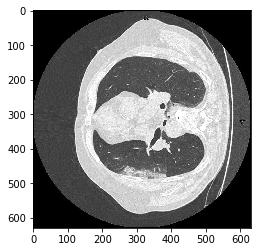

In [18]:
#CT画像は左右反転している
plt.imshow(data[:, :, 20], cmap='gray')

In [22]:
#90°回転(transpose()でｓｈａｐｅの順番を入れ替える (a,b,c)→(c, b, a))
data_t = np.transpose(data)

In [23]:
data_t.shape

(45, 630, 630)

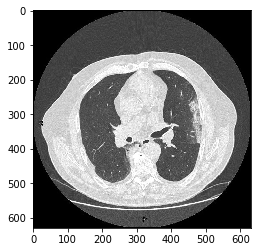

In [25]:
plt.imshow(data_t[20, :, :], cmap='gray')

In [40]:
#上記を1つの関数にまとめる
def load_nifti(path):
    im_nifti = nib.load(path)
    data = im_nifti.get_fdata()
    data = np.transpose(data)

    return data

In [40]:
#上記関数をコールしてみる
path_im = df['path_im'].iloc[0]
path_msk = df['path_msk'].iloc[0]
data_im = load_nifti(path_im)
data_msk = load_nifti(path_msk)

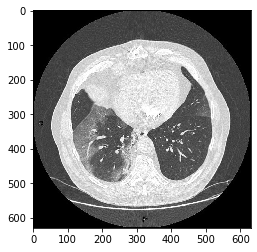

In [41]:
plt.imshow(data_im[30], cmap='gray')

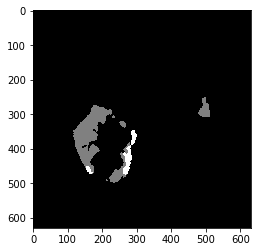

In [50]:
plt.imshow(data_msk[30], cmap='gray')

In [45]:
#0: background　病変が何もないところ
#1: ground-glass(GGO: すりガラス影) 病変
#2: Consolidation(コンソリデーション) 病変
#3: pleural effusion(胸水) 病変
np.unique(data_msk)

array([0., 1., 2.])

In [43]:
#２番目のデータが大きくてkernelが死ぬので、ＤａｔａＦｒａｍｅから除外する
df = df.drop(2)
df = df.reset_index(drop=True)

In [47]:
#DataFrameにカラムを追加し、それぞれのデータのスライス数を格納する
#カラムがない場合は先に適当な値を格納したカラムを作っておく
#下記はNaN(float)でカラム作成
df['slice_num'] = np.nan

for idx, row in tqdm(df.iterrows(), total=len(df)):
    data = load_nifti(row['path_im']) #先に作成した関数をコール
    slice_num = data.shape[0]
    df.loc[idx, 'slice_num'] = slice_num

100%|██████████| 8/8 [00:07<00:00,  1.02it/s]


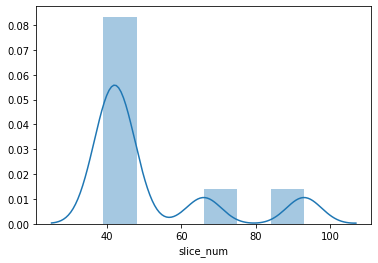

In [49]:
sns.distplot(df['slice_num'])

# multiprocessing(並列処理)

## map

In [16]:
def square(n):
    return n**2

params = [1, 2, 3, 4]

#mapの戻り値はイテレータ
#map関数を使うと、あるイテラブルなオブジェクトからそれぞれの要素を引数に入れて関数をコールする
#それをイテレータで返す
#Pythonではmapを使うことはあまりないが、multiprocessingではmapを使って並列処理をする
list(map(square, params))

[1, 4, 9, 16]

In [13]:
#mapがイテレータを返していることの確認
i = map(square, params)

In [15]:
#イテレータはnext関数で値をどんどん返す
next(i)

4

## Pool.map() と Pool.imap()

In [24]:
def wait_sec(sec):
    time.sleep(sec)
    return sec ** 2

In [27]:
#直列処理で処理時間の確認
before = time.time()
results = list(map(wait_sec, [1, 5, 3]))
after = time.time()
print('it took {} sec'.format(after - before))

it took 9.020980834960938 sec


In [28]:
results

[1, 25, 9]

In [59]:
#Pool.map()
#並列処理で処理時間の確認
#cpu_count(): 使用できるCPUの物理コア数がわかる
p = Pool(processes=cpu_count()-1)

before = time.time()
#全ての処理が完了してからリストを返す(5の処理が完了するまで1も3も値を返さない)
#返ってきたリストは元のパラメータの順番通りに値が格納されている
results = p.map(wait_sec, [1, 5, 3])
after = time.time()
print('it took {} sec'.format(after - before))

it took 5.017609596252441 sec


In [60]:
results

[1, 25, 9]

In [36]:
#Pool.imap()
#リストではなくイテレータを返す(Pythonのmapと同じイメージ)
#イテレータを返すので、tqdmが使用できる

before = time.time()
#imapはイテレータを返すのでfor文で書いてみる
for i in  p.imap(wait_sec, [1, 5, 3]):
    #処理が完了したものから出力する
    #'3'は3秒しかかかっていないが、'5'の計算が終わってから出力しているので、5秒と出力される
    #パラメータの順番は保持される
    print('{}: {} sec'.format(i, time.time()-before))

after = time.time()
print('it took {} sec'.format(after - before))

1: 1.0071768760681152 sec
25: 5.01172661781311 sec
9: 5.013275384902954 sec
it took 5.016546010971069 sec


In [61]:
#パラメータの順番を気にしないならimap_unorderedを使用する
before = time.time()
for i in  p.imap_unordered(wait_sec, [1, 5, 3]):
    print('{}: {} sec'.format(i, time.time()-before))

after = time.time()
print('it took {} sec'.format(after - before))

#並列処理を閉じる
p.close()
p.join()

1: 1.0060222148895264 sec
9: 3.0133590698242188 sec
25: 5.014936923980713 sec
it took 5.019172430038452 sec


In [54]:
#imapで複数の引数を取るにはラッパー関数を作る

def multiply(a, b):
    return a * b

#wrapper関数
#'*'はアンパックオペレータ
def wrap_multiply(args):
    return multiply(*args)

param1 = [1, 2, 3, 4]
param2 = [10, 30, 70, 20]
#zipでタプルのリストを作成する(イテレータを返す)
#[(1,10), (2,30), (3,70), (4,20)]
job_args = list(zip(param1, param2))

p = Pool(processes=cpu_count()-1)
results = list(p.imap(wrap_multiply, job_args))

#並列処理を閉じる
p.close()
p.join()

In [55]:
results

[10, 60, 210, 80]

In [56]:
job_args

[(1, 10), (2, 30), (3, 70), (4, 20)]

# 関数を別ファイルから呼び出す

In [4]:
#。pyで変更したものを自動的に読み込む
%load_ext autoreload
%autoreload 2
#0:リロードしない
#1:今だけリロードする
#2:毎回リロードする

from OtherFunc import multiply2
#from フォルダ名.ファイル名 import 関数名

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
multiply2(2, 4)

2 x 4 = 8!!


8